In [ ]:
#importing libraries
import sys
import pandas as pd
import sklearn
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
data=pd.read_csv('age_0-4.csv')
data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
data.shape

(1054, 19)

In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print(data.loc[0])


Case_No                                1
A1                                     0
A2                                     0
A3                                     0
A4                                     0
A5                                     0
A6                                     0
A7                                     1
A8                                     1
A9                                     0
A10                                    1
Age_Mons                              28
Qchat-10-Score                         3
Sex                                    f
Ethnicity                 middle eastern
Jaundice                             yes
Family_mem_with_ASD                   no
Who completed the test     family member
Class                                 No
Name: 0, dtype: object


In [ ]:
data.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class                     0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class                     0
dtype: int64

In [ ]:
# print out a description of the dataframe
data.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [ ]:
# drop unwanted columns
data = data.drop(['Qchat-10-Score', 'Who completed the test','Case_No','Sex','Family_mem_with_ASD'], axis=1)

In [ ]:
data.loc[:10]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Ethnicity,Jaundice,Class
0,0,0,0,0,0,0,1,1,0,1,28,middle eastern,yes,No
1,1,1,0,0,0,1,1,0,0,0,36,White European,yes,Yes
2,1,0,0,0,0,0,1,1,0,1,36,middle eastern,yes,Yes
3,1,1,1,1,1,1,1,1,1,1,24,Hispanic,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,White European,no,Yes
5,1,1,0,0,1,1,1,1,1,1,21,black,no,Yes
6,1,0,0,1,1,1,0,0,1,0,33,asian,yes,Yes
7,0,1,0,0,1,0,1,1,1,1,33,asian,yes,Yes
8,0,0,0,0,0,0,1,0,0,1,36,asian,no,No
9,1,1,1,0,1,1,0,1,1,1,22,south asian,no,Yes


In [ ]:
data.dtypes

A1            int64
A2            int64
A3            int64
A4            int64
A5            int64
A6            int64
A7            int64
A8            int64
A9            int64
A10           int64
Age_Mons      int64
Ethnicity    object
Jaundice     object
Class        object
dtype: object

In [ ]:
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Ethnicity,Jaundice,Class
0,0,0,0,0,0,0,1,1,0,1,28,middle eastern,yes,No
1,1,1,0,0,0,1,1,0,0,0,36,White European,yes,Yes
2,1,0,0,0,0,0,1,1,0,1,36,middle eastern,yes,Yes
3,1,1,1,1,1,1,1,1,1,1,24,Hispanic,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,White European,no,Yes


In [ ]:
data=data.rename(columns = {'Class/ASD Traits':'Class'})

In [ ]:
x = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
x.loc[:10]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Ethnicity,Jaundice
0,0,0,0,0,0,0,1,1,0,1,28,middle eastern,yes
1,1,1,0,0,0,1,1,0,0,0,36,White European,yes
2,1,0,0,0,0,0,1,1,0,1,36,middle eastern,yes
3,1,1,1,1,1,1,1,1,1,1,24,Hispanic,no
4,1,1,0,1,1,1,1,1,1,1,20,White European,no
5,1,1,0,0,1,1,1,1,1,1,21,black,no
6,1,0,0,1,1,1,0,0,1,0,33,asian,yes
7,0,1,0,0,1,0,1,1,1,1,33,asian,yes
8,0,0,0,0,0,0,1,0,0,1,36,asian,no
9,1,1,1,0,1,1,0,1,1,1,22,south asian,no


In [ ]:
# convert the data to categorical values - one-hot-encoded vectors
X = pd.get_dummies(x)

In [ ]:
# print the new categorical column labels
X.columns.values

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Ethnicity_Hispanic', 'Ethnicity_Latino',
       'Ethnicity_Native Indian', 'Ethnicity_Others',
       'Ethnicity_Pacifica', 'Ethnicity_White European',
       'Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian', 'Jaundice_no',
       'Jaundice_yes'], dtype=object)

In [ ]:
# print an example patient from the categorical data
X.loc[1]


A1                           1
A2                           1
A3                           0
A4                           0
A5                           0
A6                           1
A7                           1
A8                           0
A9                           0
A10                          0
Age_Mons                    36
Ethnicity_Hispanic           0
Ethnicity_Latino             0
Ethnicity_Native Indian      0
Ethnicity_Others             0
Ethnicity_Pacifica           0
Ethnicity_White European     1
Ethnicity_asian              0
Ethnicity_black              0
Ethnicity_middle eastern     0
Ethnicity_mixed              0
Ethnicity_south asian        0
Jaundice_no                  0
Jaundice_yes                 1
Name: 1, dtype: int64

In [ ]:
# convert the class data to categorical values - one-hot-encoded vectors
Y = pd.get_dummies(y)

In [ ]:
Y.iloc[:10]

,No,Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1


In [ ]:
print(data['Class'].value_counts(ascending=True))

No     326
Yes    728
Name: Class, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X)
vectorizer.vocabulary_

{'A1': 0,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'A6': 6,
 'A7': 7,
 'A8': 8,
 'A9': 9,
 'A10': 1,
 'Age_Mons': 10,
 'Ethnicity_Hispanic': 11,
 'Ethnicity_Latino': 12,
 'Ethnicity_Native': 13,
 'Indian': 23,
 'Ethnicity_Others': 14,
 'Ethnicity_Pacifica': 15,
 'Ethnicity_White': 16,
 'European': 22,
 'Ethnicity_asian': 17,
 'Ethnicity_black': 18,
 'Ethnicity_middle': 19,
 'eastern': 27,
 'Ethnicity_mixed': 20,
 'Ethnicity_south': 21,
 'asian': 26,
 'Jaundice_no': 24,
 'Jaundice_yes': 25}

In [ ]:
vectorizer.transform(X).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
# split the X and Y data into training and testing dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2,random_state=42)

In [ ]:
from keras.layers.pooling.max_pooling1d import MaxPool1D
# build a neural network using Keras
input_dim = X_train.shape[1]
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Conv1D, GlobalMaxPool1D, Dense

# define a function to build the keras model

def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPool1D(pool_size=2, strides=1, padding='valid'))

    model.add(GlobalMaxPool1D())
    model.add(Dense(8, input_shape=(96, 1), kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='he_normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))


    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = create_model()



In [ ]:


model.build(input_shape=(None, 96, 1))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 92, 128)           768       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 91, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 87, 128)           82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 86, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 82, 128)           82048     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 81, 128)          0

In [ ]:
#fit the model to the train
history=model.fit(X_train, Y_train, epochs=20,batch_size=10,validation_data=(X_test, Y_test), verbose = 1)

Epoch 1/20
85/85 [==============================] - 4s 34ms/step - loss: 0.6084 - accuracy: 0.6951 - val_loss: 0.5225 - val_accuracy: 0.6730
Epoch 2/20
85/85 [==============================] - 1s 17ms/step - loss: 0.4675 - accuracy: 0.6951 - val_loss: 0.3743 - val_accuracy: 0.6730
Epoch 3/20
85/85 [==============================] - 1s 15ms/step - loss: 0.3417 - accuracy: 0.7936 - val_loss: 0.3071 - val_accuracy: 0.9289
Epoch 4/20
85/85 [==============================] - 1s 17ms/step - loss: 0.3047 - accuracy: 0.9122 - val_loss: 0.3311 - val_accuracy: 0.9005
Epoch 5/20
85/85 [==============================] - 1s 17ms/step - loss: 0.3190 - accuracy: 0.8992 - val_loss: 0.2743 - val_accuracy: 0.9479
Epoch 6/20
85/85 [==============================] - 2s 18ms/step - loss: 0.2883 - accuracy: 0.9039 - val_loss: 0.3279 - val_accuracy: 0.8531
Epoch 7/20
85/85 [==============================] - 2s 18ms/step - loss: 0.2531 - accuracy: 0.9063 - val_loss: 0.1908 - val_accuracy: 0.9384
Epoch 8/20
85

In [ ]:
#generate classification report using predictions for categorical model

from sklearn.metrics import classification_report, accuracy_score
predictions = model.predict(X_test).round()
classes=np.argmax(predictions,axis=1)
predictions

7/7 [==============================] - 0s 8ms/step


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [ ]:
score = accuracy_score(Y_test,predictions)
score

0.9383886255924171

In [ ]:
print('Results for Categorical Model')
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Results for Categorical Model
0.9383886255924171
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        69
           1       1.00      0.91      0.95       142

   micro avg       0.94      0.94      0.94       211
   macro avg       0.93      0.95      0.94       211
weighted avg       0.95      0.94      0.94       211
 samples avg       0.94      0.94      0.94       211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9466
Testing Accuracy:  0.9431


In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

7/7 - 0s - loss: 0.1037 - accuracy: 0.9431 - 89ms/epoch - 13ms/step


In [ ]:
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


Test Loss 0.10373903810977936
Test Accuracy 0.9431279897689819


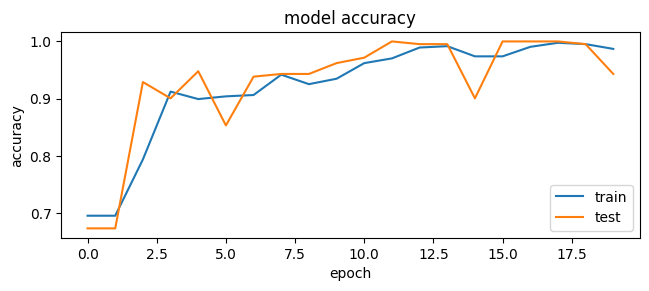

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.tight_layout()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.savefig('1.png',dpi=300,bbox_inches='tight')

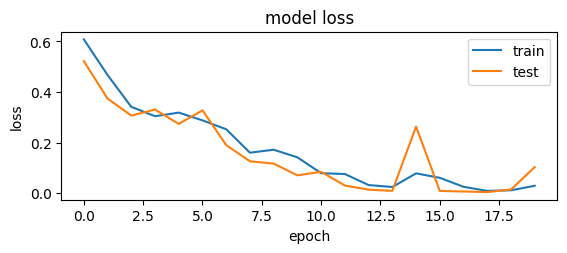

In [ ]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('2.png',dpi=300,bbox_inches='tight')